Import modules

In [1]:
from scipy.interpolate import griddata
import pickle
import springlattice.output_1 as so
import numpy as np
import matplotlib.pyplot as plt

mplstyle file for formating plot

In [2]:
# specify the mplstyle file for the plot
mplstyle_file = r'C:\Users\vinee\OneDrive\Documents\vscode\stressed network model\article_preprint.mplstyle'
plt.style.use(f'{mplstyle_file}')

We will read one of the simulation data and extract inelastic strain component. For present, we are reading simulation data corresponding to inelastic strain profile $m = 5$ and plot $\epsilon_{xx}^*$ component.

In [3]:
# specify data directory and plot saving directory
data_dir_path = r'C:\MyData\Stressed network work\Data\dec_m5_R108_e02_220X254'

# load mesh information
mesh = so.load_mesh(data_dir_path, 'static')
mesh.folder = data_dir_path
pos = mesh.pos
# get initial field
exx = mesh.plastic_strain['exx']

Extracting a data along a radial line 

In [4]:
# define the line
x1, y1 = np.mean(pos[:,0]), np.mean(pos[:,1])
x2, y2 = np.max(pos[:,0])-1, np.max(pos[:,1])-1

xline = np.linspace(x1, x2, 200)
yline = y1 + (y2 - y1)/(x2 - x1)*(xline - x1)
r = np.sqrt((xline - x1)**2 + (yline - y1)**2)

# interpolate the field at the line points
exx1_line = griddata(pos, exx, (xline, yline), method='cubic')

Plotting the result

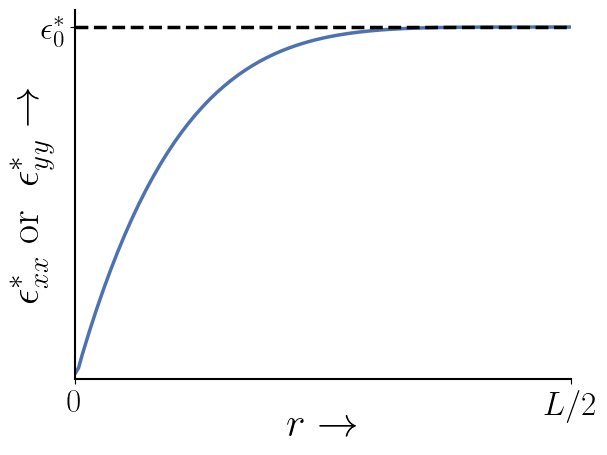

In [26]:
save_path = r'C:\MyData\Stressed network work\Data\simulation'
R = 108
fig, ax = plt.subplots()
ax.plot(r/R, exx1_line, label = r'$m=5$') 
ax.hlines(y= 0.02, xmin = 0, xmax = 1, color = 'black', linestyle = '--', label = r'$\epsilon_{yy}^* = 0.02$')
ax.set_xlabel(r'$r\rightarrow$', fontsize=30, labelpad=-10)
ax.set_ylabel(r'$\epsilon_{xx}^* \;\rm{or}\;$ $\epsilon_{yy}^*\rightarrow$', fontsize=30, labelpad=-10)
ax.set_xlim([0, 1])
ax.set_ylim(bottom = 0)
ax.set_xticks([0, 1])
ax.set_xticklabels(['0', r'$L/2$'], fontsize = 24)
ax.set_yticks([0.02])
ax.set_yticklabels([r'$\epsilon_0^*$'], fontsize = 24)
plt.show()
fig.savefig(save_path + '/inelastic_strain_m5.png', bbox_inches = 'tight', dpi = 300)
